In [ ]:
from keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [ ]:
# Define a One-hot vector of 10 000 dimensions that put 0 if the words doesn't exist in the sequence or 1 if it does exist
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # Setting the 10 000 vector full of zero
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 # Set 1 to specific indices of words
  return results

In [ ]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32') 

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential(
    [
     layers.Dense(64, activation='relu', input_shape=(10000,)),
     layers.Dense(64, activation='relu'),
     layers.Dense(46, activation='softmax')
    ]
)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 3.0750 - accuracy: 0.4315 - val_loss: 1.6894 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4568 - accuracy: 0.6977 - val_loss: 1.2794 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0533 - accuracy: 0.7776 - val_loss: 1.0991 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7878 - accuracy: 0.8338 - val_loss: 1.0108 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6554 - accuracy: 0.8626 - val_loss: 0.9471 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5094 - accuracy: 0.8882 - val_loss: 0.9328 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4195 - accuracy: 0.9112 - val_loss: 0.8922 - val_accuracy: 0.8210
Epoch 8/20
16

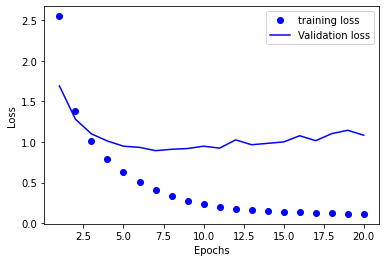

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

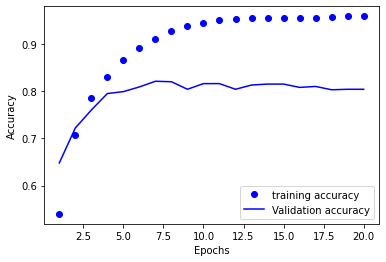

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.2092 - accuracy: 0.7894


[1.2092487812042236, 0.7894033789634705]

In [ ]:
predictions = model.predict(x_test)
predictions

array([[1.5461914e-06, 2.6247915e-07, 4.7627996e-08, ..., 3.0731130e-08,
        5.3089688e-09, 7.2890711e-09],
       [2.0099139e-04, 7.5662844e-02, 9.7045461e-03, ..., 5.7591178e-06,
        7.0907491e-10, 5.9203503e-05],
       [4.6915796e-02, 1.3116910e-01, 1.4367183e-02, ..., 4.5685880e-04,
        2.6211998e-04, 2.0899659e-05],
       ...,
       [7.9783490e-07, 1.6834925e-06, 2.9521132e-07, ..., 7.0493641e-08,
        3.4241910e-07, 2.7689500e-08],
       [7.0098387e-03, 5.0219335e-02, 6.2883599e-03, ..., 7.3810763e-05,
        2.4994946e-04, 6.3598185e-04],
       [1.4699097e-03, 3.7872198e-01, 1.7868705e-02, ..., 8.8183851e-06,
        4.9954124e-05, 8.5327219e-06]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

Epoch 1/10
16/16 [==============================] - 2s 88ms/step - loss: 2.8349 - accuracy: 0.4720 - val_loss: 1.5022 - val_accuracy: 0.6970
Epoch 2/10
16/16 [==============================] - 1s 76ms/step - loss: 1.2248 - accuracy: 0.7589 - val_loss: 1.1265 - val_accuracy: 0.7810
Epoch 3/10
16/16 [==============================] - 1s 76ms/step - loss: 0.8218 - accuracy: 0.8428 - val_loss: 0.9641 - val_accuracy: 0.8060
Epoch 4/10
16/16 [==============================] - 1s 75ms/step - loss: 0.6124 - accuracy: 0.8770 - val_loss: 0.8929 - val_accuracy: 0.8050
Epoch 5/10
16/16 [==============================] - 1s 75ms/step - loss: 0.4445 - accuracy: 0.9142 - val_loss: 0.8686 - val_accuracy: 0.8150
Epoch 6/10
16/16 [==============================] - 1s 75ms/step - loss: 0.3460 - accuracy: 0.9304 - val_loss: 0.8426 - val_accuracy: 0.8130
Epoch 7/10
16/16 [==============================] - 1s 78ms/step - loss: 0.2807 - accuracy: 0.9442 - val_loss: 0.8162 - val_accuracy: 0.8260
Epoch 8/10
16

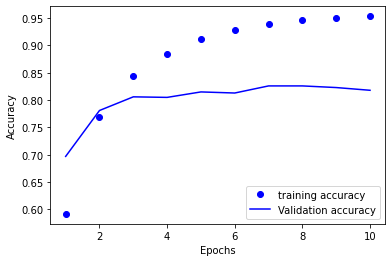

In [ ]:
# Testing different model architectures
model = models.Sequential(
    [
     layers.Dense(128, activation='relu', input_shape=(10000,)),
     layers.Dense(46, activation='softmax')
    ]
)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()